In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Dimensões para visualização de datasets
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.8f}'.format)

In [3]:
train = pd.read_csv('train.csv')
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.00000000,0.00000000,0.00000000,6/30/2014,7/31/2014,8/31/2014,31.27700000,87.00900000,7.52700000,48.58000000,124.38000000,1.29000000,32.24000000,96.68000000,2.33000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,2.23000000,0.00000000,0.28000000,5.29000000,16.04000000,2.33000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,7.53000000,16.04000000,2.61000000,46.34000000,124.38000000,1.01000000,18.75000000,80.61000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,65.09000000,204.99000000,1.01000000,0.00000000,0.00000000,0.00000000,8.20000000,0.63000000,0.00000000,0.38000000,0.00000000,0.00000000,81.21000000,221.68000000,3.63000000,2.43000000,3.68000000,7.79000000,0.83000000,21.08000000,16.91000000,0.00000000,0.00000000,0.00000000,3.26000000,24.76000000,24.71000000,0.00000000,7.61000000,0.21000000,7.46000000,19.96000000,14.96000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,7.46000000,27.58000000,15.18000000,11.84000000,53.04000000,40.56000000,0.00000000,0.00000000,0.66000000,0.00000000,0.00000000,0.00000000,1.11000000,0.69000000,0.00000000,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00000000,0

In [5]:
features_names = [
"loc_og_t2o_mou",
"std_og_t2o_mou",
"loc_ic_t2o_mou",
"arpu_6",
"arpu_7",
"arpu_8",
"onnet_mou_6",
"onnet_mou_7",
"onnet_mou_8",
"offnet_mou_6",
"offnet_mou_7",
"offnet_mou_8",
"roam_ic_mou_6",
"roam_ic_mou_7",
"roam_ic_mou_8",
"roam_og_mou_6",
"roam_og_mou_7",
"roam_og_mou_8",
"loc_og_t2t_mou_6",
"loc_og_t2t_mou_7",
"loc_og_t2t_mou_8",
"loc_og_t2m_mou_6",
"loc_og_t2m_mou_7",
"loc_og_t2m_mou_8",
"loc_og_t2f_mou_6",
"loc_og_t2f_mou_7",
"loc_og_t2f_mou_8",
"loc_og_t2c_mou_6",
"loc_og_t2c_mou_7",
"loc_og_t2c_mou_8",
"loc_og_mou_6",
"loc_og_mou_7",
"loc_og_mou_8",
"std_og_t2t_mou_6",
"std_og_t2t_mou_7",
"std_og_t2t_mou_8",
"std_og_t2m_mou_6",
"std_og_t2m_mou_7",
"std_og_t2m_mou_8",
"std_og_t2f_mou_6",
"std_og_t2f_mou_7",
"std_og_t2f_mou_8",
"std_og_t2c_mou_6",
"std_og_t2c_mou_7",
"std_og_t2c_mou_8",
"std_og_mou_6",
"std_og_mou_7",
"std_og_mou_8",
"isd_og_mou_6",
"isd_og_mou_7",
"isd_og_mou_8",
"spl_og_mou_6",
"spl_og_mou_7",
"spl_og_mou_8",
"og_others_6",
"og_others_7",
"og_others_8",
"total_og_mou_6",
"total_og_mou_7",
"total_og_mou_8",
"loc_ic_t2t_mou_6",
"loc_ic_t2t_mou_7",
"loc_ic_t2t_mou_8",
"loc_ic_t2m_mou_6",
"loc_ic_t2m_mou_7",
"loc_ic_t2m_mou_8",
"loc_ic_t2f_mou_6",
"loc_ic_t2f_mou_7",
"loc_ic_t2f_mou_8",
"loc_ic_mou_6",
"loc_ic_mou_7",
"loc_ic_mou_8",
"std_ic_t2t_mou_6",
"std_ic_t2t_mou_7",
"std_ic_t2t_mou_8",
"std_ic_t2m_mou_6",
"std_ic_t2m_mou_7",
"std_ic_t2m_mou_8",
"std_ic_t2f_mou_6",
"std_ic_t2f_mou_7",
"std_ic_t2f_mou_8",
"std_ic_t2o_mou_6",
"std_ic_t2o_mou_7",
"std_ic_t2o_mou_8",
"std_ic_mou_6",
"std_ic_mou_7",
"std_ic_mou_8",
"total_ic_mou_6",
"total_ic_mou_7",
"total_ic_mou_8",
"spl_ic_mou_6",
"spl_ic_mou_7",
"spl_ic_mou_8",
"isd_ic_mou_6",
"isd_ic_mou_7",
"isd_ic_mou_8",
"ic_others_6",
"ic_others_7",
"ic_others_8",
"total_rech_num_6",
"total_rech_num_7",
"total_rech_num_8",
"total_rech_amt_6",
"total_rech_amt_7",
"total_rech_amt_8",
"max_rech_amt_6",
"max_rech_amt_7",
"max_rech_amt_8",
"last_day_rch_amt_6",
"last_day_rch_amt_7",
"last_day_rch_amt_8",
"total_rech_data_6",
"total_rech_data_7",
"total_rech_data_8",
"max_rech_data_6",
"max_rech_data_7",
"max_rech_data_8",
"count_rech_2g_6",
"count_rech_2g_7",
"count_rech_2g_8",
"count_rech_3g_6",
"count_rech_3g_7",
"count_rech_3g_8",
"av_rech_amt_data_6",
"av_rech_amt_data_7",
"av_rech_amt_data_8",
"vol_2g_mb_6",
"vol_2g_mb_7",
"vol_2g_mb_8",
"vol_3g_mb_6",
"vol_3g_mb_7",
"vol_3g_mb_8",
"arpu_3g_6",
"arpu_3g_7",
"arpu_3g_8",
"arpu_2g_6",
"arpu_2g_7",
"arpu_2g_8",
"night_pck_user_6",
"night_pck_user_7",
"night_pck_user_8",
"monthly_2g_6",
"monthly_2g_7",
"monthly_2g_8",
"sachet_2g_6",
"sachet_2g_7",
"sachet_2g_8",
"monthly_3g_6",
"monthly_3g_7",
"monthly_3g_8",
"sachet_3g_6",
"sachet_3g_7",
"sachet_3g_8",
"fb_user_6",
"fb_user_7",
"fb_user_8",
"aon",
"aug_vbc_3g",
"jul_vbc_3g",
"jun_vbc_3g"]

In [15]:
train[features_names].sum()

loc_og_t2o_mou              0.00000000
std_og_t2o_mou              0.00000000
loc_ic_t2o_mou              0.00000000
arpu_6               19819122.40800000
arpu_7               19472735.64000000
arpu_8               19519838.99100000
onnet_mou_6           8952027.81000000
onnet_mou_7           9012702.44000000
onnet_mou_8           8815926.52000000
offnet_mou_6         13370549.70000000
offnet_mou_7         13270788.51000000
offnet_mou_8         13030052.95000000
roam_ic_mou_6          656539.97000000
roam_ic_mou_7          472164.60000000
roam_ic_mou_8          464396.32000000
roam_og_mou_6          953769.71000000
roam_og_mou_7          662497.55000000
roam_og_mou_8          647830.13000000
loc_og_t2t_mou_6      3153460.25000000
loc_og_t2t_mou_7      3107559.68000000
loc_og_t2t_mou_8      3028806.31000000
loc_og_t2m_mou_6      6268499.52000000
loc_og_t2m_mou_7      6111878.42000000
loc_og_t2m_mou_8      6040987.47000000
loc_og_t2f_mou_6       251657.68000000
loc_og_t2f_mou_7       25

In [51]:
tb_na = pd.DataFrame(train[features_names].isna().sum()).reset_index(level=0)
tb_na.columns = ['variable', 'missing']
tb_na['missing_perc'] = (tb_na['missing'] / train.id.count()) * 100
tb_na.to_csv('sub09_tb_na.csv', sep=';', index=False)
print(tb_na.head())

         variable  missing  missing_perc
0  loc_og_t2o_mou      702    1.00287147
1  std_og_t2o_mou      702    1.00287147
2  loc_ic_t2o_mou      702    1.00287147
3          arpu_6        0    0.00000000
4          arpu_7        0    0.00000000


In [53]:
# Using variables with less than 10% of missing values
features_names_LessMissing = ["onnet_mou_8",
"offnet_mou_8",
"roam_ic_mou_8",
"roam_og_mou_8",
"loc_og_t2t_mou_8",
"loc_og_t2m_mou_8",
"loc_og_t2f_mou_8",
"loc_og_t2c_mou_8",
"loc_og_mou_8",
"std_og_t2t_mou_8",
"std_og_t2m_mou_8",
"std_og_t2f_mou_8",
"std_og_t2c_mou_8",
"std_og_mou_8",
"isd_og_mou_8",
"spl_og_mou_8",
"og_others_8",
"loc_ic_t2t_mou_8",
"loc_ic_t2m_mou_8",
"loc_ic_t2f_mou_8",
"loc_ic_mou_8",
"std_ic_t2t_mou_8",
"std_ic_t2m_mou_8",
"std_ic_t2f_mou_8",
"std_ic_t2o_mou_8",
"std_ic_mou_8",
"spl_ic_mou_8",
"isd_ic_mou_8",
"ic_others_8",
"onnet_mou_6",
"offnet_mou_6",
"roam_ic_mou_6",
"roam_og_mou_6",
"loc_og_t2t_mou_6",
"loc_og_t2m_mou_6",
"loc_og_t2f_mou_6",
"loc_og_t2c_mou_6",
"loc_og_mou_6",
"std_og_t2t_mou_6",
"std_og_t2m_mou_6",
"std_og_t2f_mou_6",
"std_og_t2c_mou_6",
"std_og_mou_6",
"isd_og_mou_6",
"spl_og_mou_6",
"og_others_6",
"loc_ic_t2t_mou_6",
"loc_ic_t2m_mou_6",
"loc_ic_t2f_mou_6",
"loc_ic_mou_6",
"std_ic_t2t_mou_6",
"std_ic_t2m_mou_6",
"std_ic_t2f_mou_6",
"std_ic_t2o_mou_6",
"std_ic_mou_6",
"spl_ic_mou_6",
"isd_ic_mou_6",
"ic_others_6",
"onnet_mou_7",
"offnet_mou_7",
"roam_ic_mou_7",
"roam_og_mou_7",
"loc_og_t2t_mou_7",
"loc_og_t2m_mou_7",
"loc_og_t2f_mou_7",
"loc_og_t2c_mou_7",
"loc_og_mou_7",
"std_og_t2t_mou_7",
"std_og_t2m_mou_7",
"std_og_t2f_mou_7",
"std_og_t2c_mou_7",
"std_og_mou_7",
"isd_og_mou_7",
"spl_og_mou_7",
"og_others_7",
"loc_ic_t2t_mou_7",
"loc_ic_t2m_mou_7",
"loc_ic_t2f_mou_7",
"loc_ic_mou_7",
"std_ic_t2t_mou_7",
"std_ic_t2m_mou_7",
"std_ic_t2f_mou_7",
"std_ic_t2o_mou_7",
"std_ic_mou_7",
"spl_ic_mou_7",
"isd_ic_mou_7",
"ic_others_7",
"loc_og_t2o_mou",
"std_og_t2o_mou",
"loc_ic_t2o_mou",
"arpu_6",
"arpu_7",
"arpu_8",
"total_og_mou_6",
"total_og_mou_7",
"total_og_mou_8",
"total_ic_mou_6",
"total_ic_mou_7",
"total_ic_mou_8",
"total_rech_num_6",
"total_rech_num_7",
"total_rech_num_8",
"total_rech_amt_6",
"total_rech_amt_7",
"total_rech_amt_8",
"max_rech_amt_6",
"max_rech_amt_7",
"max_rech_amt_8",
"last_day_rch_amt_6",
"last_day_rch_amt_7",
"last_day_rch_amt_8",
"vol_2g_mb_6",
"vol_2g_mb_7",
"vol_2g_mb_8",
"vol_3g_mb_6",
"vol_3g_mb_7",
"vol_3g_mb_8",
"monthly_2g_6",
"monthly_2g_7",
"monthly_2g_8",
"sachet_2g_6",
"sachet_2g_7",
"sachet_2g_8",
"monthly_3g_6",
"monthly_3g_7",
"monthly_3g_8",
"sachet_3g_6",
"sachet_3g_7",
"sachet_3g_8",
"aon",
"aug_vbc_3g",
"jul_vbc_3g",
"jun_vbc_3g"]

In [54]:
# Using variables without missing values
feature_names_WithoutMissing = ["arpu_6",
"arpu_7",
"arpu_8",
"total_og_mou_6",
"total_og_mou_7",
"total_og_mou_8",
"total_ic_mou_6",
"total_ic_mou_7",
"total_ic_mou_8",
"total_rech_num_6",
"total_rech_num_7",
"total_rech_num_8",
"total_rech_amt_6",
"total_rech_amt_7",
"total_rech_amt_8",
"max_rech_amt_6",
"max_rech_amt_7",
"max_rech_amt_8",
"last_day_rch_amt_6",
"last_day_rch_amt_7",
"last_day_rch_amt_8",
"vol_2g_mb_6",
"vol_2g_mb_7",
"vol_2g_mb_8",
"vol_3g_mb_6",
"vol_3g_mb_7",
"vol_3g_mb_8",
"monthly_2g_6",
"monthly_2g_7",
"monthly_2g_8",
"sachet_2g_6",
"sachet_2g_7",
"sachet_2g_8",
"monthly_3g_6",
"monthly_3g_7",
"monthly_3g_8",
"sachet_3g_6",
"sachet_3g_7",
"sachet_3g_8",
"aon",
"aug_vbc_3g",
"jul_vbc_3g",
"jun_vbc_3g"]

In [55]:
X_train1 = train.set_index('id')[features_names_LessMissing].fillna(train.mean())
X_train1.head()

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_t2c_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.29000000,2.33000000,0.00000000,0.00000000,0.28000000,2.33000000,0.00000000,0.00000000,2.61000000,1.01000000,0.00000000,0.00000000,0.00000000,1.01000000,0.00000000,0.00000000,0.00000000,7.79000000,16.91000000,0.00000000,24.71000000,0.21000000,14.96000000,0.00000000,0.00000000,15.18000000,0.66000000,0.00000000,0.00000000,48.58000000,32.24000000,0.00000000,0.00000000,2.23000000,5.29000000,0.00000000,0.00000000,7.53000000,46.34000000,18.75000000,0.00000000,0.00000000,65.09000000,0.00000000,8.20000000,0.38000000,2.43000000,0.83000000,0.00000000,3.26000000,0.00000000,7.46000000,0.00000000,0.00000000,7.46000000,0.00000000,0.00000000,1.11000000,124.38000000,96.68000000,0.00000000,0.00000000,0.00000000,16.04000000,0.00000000,0.00000000,16.04000000,124.38000000,80.61000000,0.00000000,0.00000000,204.99000000,0.00000000,0.63000000,0.00000000,3.68000000,21.08000000,0.00000000,24.76000000,7.61000000,19.96000000,0.00000000,0.00000000,27.58000000,0.00000000,0.00000000,0.69000000,0.00000000,0.00000000,0.00000000,31.27700000,87.00900000,7.52700000,81.21000000,221.68000000,3.63000000,11.84000000,53.04000000,40.56000000,3,2,2,77,65,10,65,65,10,65,65,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00000000,0.00000000,0.00000000
1,0.00000000,30.89000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,29.79000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,31.66000000,0.00000000,10.53000000,11.09000000,3.40000000,25.03000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.68000000,1.41000000,0.35000000,3.44000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000

In [56]:
X_train2 = train.set_index('id')[feature_names_WithoutMissing].fillna(train.mean())
X_train2.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31.27700000,87.00900000,7.52700000,81.21000000,221.68000000,3.63000000,11.84000000,53.04000000,40.56000000,3,2,2,77,65,10,65,65,10,65,65,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00000000,0.00000000,0.00000000
1,0.00000000,122.78700000,42.95300000,0.00000000,30.73000000,31.66000000,3.44000000,39.44000000,25.04000000,3,4,5,0,145,50,0,145,50,0,0,0,0.00000000,352.91000000,0.00000000,0.00000000,3.96000000,0.00000000,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00000000,0.00000000,0.00000000
2,60.80600000,103.17600000,0.00000000,56.49000000,99.36000000,0.00000000,124.29000000,33.83000000,36.64000000,2,4,2,70,120,0,70,70,0,70,50,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,882,0.00000000,0.00000000,0.00000000
3,156.36200000,205.26000000,111.09500000,76.03000000,95.98000000,53.84000000,95.11000000,50.18000000,83.84000000,2,4,3,160,240,130,110,110,50,110,110,50,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,982,0.00000000,0.00000000,0.00000000
4,240.70800000,128.19100000,101.56500000,63.26000000,42.94000000,15.76000000,21.54000000,9.36000000,28.31000000,13,10,8,290,136,122,50,41,30,25,10,30,390.80000000,308.89000000,213.47000000,0.00000000,0.00000000,0.00000000,0,0,0,7,6,6,0,0,0,0,1,0,647,0.00000000,0.00000000,0.00000000


In [59]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X_train1)
X2 = scaler.fit_transform(X_train2)

In [60]:
y = train['churn_probability']

In [61]:
%%time
clf_x1_RC = RandomForestClassifier(random_state=12345)
clf_x1_RC.fit(X1,y)

Wall time: 3min 43s


RandomForestClassifier(random_state=12345)

In [62]:
%%time
clf_x1_LR = LogisticRegression(random_state=12345)
clf_x1_LR.fit(X1,y)

Wall time: 2.41 s


c:\users\lincoln.thiago.neves\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=12345)

In [63]:
%%time
clf_x2_RC = RandomForestClassifier(random_state=12345)
clf_x2_RC.fit(X2,y)

Wall time: 47.6 s


RandomForestClassifier(random_state=12345)

In [64]:
%%time
clf_x2_LR = LogisticRegression(random_state=12345)
clf_x2_LR.fit(X2,y)

Wall time: 1.85 s


LogisticRegression(random_state=12345)

## Verifying the accuracy of the models created

In [ ]:
resultados_clf_x1_RC = cross_val_predict(clf_x1_RC, X, y, cv = 5)
print(metrics.classification_report(y, resultados_clf_x1_RC))

In [ ]:
resultados_clf_x1_LR = cross_val_predict(clf_x1_LR, X, y, cv = 5)
print(metrics.classification_report(y, resultados_clf_x1_LR))

In [ ]:
resultados_clf_x2_RC = cross_val_predict(clf_x2_RC, X, y, cv = 5)
print(metrics.classification_report(y, resultados_clf_x2_RC))

In [ ]:
resultados_clf_x2_LR = cross_val_predict(clf_x2_LR, X, y, cv = 5)
print(metrics.classification_report(y, resultados_clf_x2_LR))

## Predict test dataset with the first ML model

In [65]:
test = pd.read_csv('test.csv')
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.00000000,0.00000000,0.00000000,6/30/2014,7/31/2014,8/31/2014,91.88200000,65.33000000,64.44500000,31.78000000,20.23000000,23.11000000,60.16000000,32.16000000,34.83000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,24.88000000,20.23000000,21.06000000,18.13000000,10.89000000,8.36000000,0.00000000,13.58000000,0.00000000,0.00000000,0.00000000,0.03000000,43.01000000,44.71000000,29.43000000,6.90000000,0.00000000,2.05000000,42.03000000,7.68000000,26.43000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,48.93000000,7.68000000,28.48000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.03000000,0.00000000,0.00000000,0.00000000,91.94000000,52.39000000,57.94000000,30.33000000,37.56000000,21.98000000,10.21000000,4.59000000,9.53000000,0.26000000,0.00000000,0.00000000,40.81000000,42.16000000,31.51000000,0.00000000,0.00000000,0.00000000,0.36000000,1.04000000,4.34000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.36000000,1.04000000,4.34000000,41.73000000,43.56000000,36.26000000,0.54000000,0.34000000,0.39000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00000000,0.00000000

In [66]:
test1 = test.set_index('id')[features_names_LessMissing].fillna(test.mean())
test1.head()

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_t2c_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,23.11000000,34.83000000,0.00000000,0.00000000,21.06000000,8.36000000,0.00000000,0.03000000,29.43000000,2.05000000,26.43000000,0.00000000,0.00000000,28.48000000,0.00000000,0.03000000,0.00000000,21.98000000,9.53000000,0.00000000,31.51000000,0.00000000,4.34000000,0.00000000,0.00000000,4.34000000,0.39000000,0.00000000,0.00000000,31.78000000,60.16000000,0.00000000,0.00000000,24.88000000,18.13000000,0.00000000,0.00000000,43.01000000,6.90000000,42.03000000,0.00000000,0.00000000,48.93000000,0.00000000,0.00000000,0.00000000,30.33000000,10.21000000,0.26000000,40.81000000,0.00000000,0.36000000,0.00000000,0.00000000,0.36000000,0.54000000,0.00000000,0.00000000,20.23000000,32.16000000,0.00000000,0.00000000,20.23000000,10.89000000,13.58000000,0.00000000,44.71000000,0.00000000,7.68000000,0.00000000,0.00000000,7.68000000,0.00000000,0.00000000,0.00000000,37.56000000,4.59000000,0.00000000,42.16000000,0.00000000,1.04000000,0.00000000,0.00000000,1.04000000,0.34000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,91.88200000,65.33000000,64.44500000,91.94000000,52.39000000,57.94000000,41.73000000,43.56000000,36.26000000,5,5,4,103,90,60,50,30,30,30,30,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00000000,0.00000000,0.00000000
70000,19.84000000,394.94000000,0.00000000,0.00000000,19.84000000,377.26000000,0.00000000,0.00000000,397.11000000,0.00000000,17.68000000,0.00000000,0.00000000,17.68000000,0.80000000,0.00000000,0.00000000,2.61000000,184.81000000,0.00000000,187.43000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,94.23000000,0.00000000,75.51000000,474.34000000,0.00000000,0.00000000,75.51000000,473.61000000,0.73000000,0.00000000,549.86000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,19.99000000,160.19000000,1.49000000,181.69000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000

In [67]:
test2 = test.set_index('id')[feature_names_WithoutMissing].fillna(test.mean())
test2.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,91.88200000,65.33000000,64.44500000,91.94000000,52.39000000,57.94000000,41.73000000,43.56000000,36.26000000,5,5,4,103,90,60,50,30,30,30,30,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00000000,0.00000000,0.00000000
70000,414.16800000,515.56800000,360.86800000,549.86000000,663.06000000,415.59000000,296.33000000,339.64000000,281.66000000,5,4,5,500,500,500,250,250,250,250,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00000000,0.00000000,0.00000000
70001,329.84400000,434.88400000,746.23900000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,9,5,500,1000,1000,300,500,500,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61000000,758.41000000,241.84000000
70002,43.55000000,171.39000000,24.40000000,45.36000000,207.18000000,24.01000000,555.69000000,522.44000000,549.13000000,3,5,2,110,260,0,110,150,0,110,150,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,1244,0.00000000,0.00000000,0.00000000
70003,306.85400000,406.28900000,413.32900000,514.79000000,638.28000000,779.78000000,53.73000000,115.93000000,159.26000000,11,7,8,356,490,546,90,130,130,50,130,130,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0,462,0.00000000,0.00000000,0.00000000


In [68]:
X_test1 = scaler.fit_transform(test1)
X_test2 = scaler.fit_transform(test2)

In [70]:
preds_clf_x1_RC = clf_x1_RC.predict(X_test1)
preds_clf_x1_LR = clf_x1_LR.predict(X_test1)
preds_clf_x2_RC = clf_x2_RC.predict(X_test2)
preds_clf_x2_LR = clf_x2_LR.predict(X_test2)

In [71]:
preds_clf_x1_RC_ = pd.DataFrame(preds_clf_x1_RC, columns=['churn_probability'])
preds_clf_x1_LR_ = pd.DataFrame(preds_clf_x1_LR, columns=['churn_probability'])
preds_clf_x2_RC_ = pd.DataFrame(preds_clf_x2_RC, columns=['churn_probability'])
preds_clf_x2_LR_ = pd.DataFrame(preds_clf_x2_LR, columns=['churn_probability'])

In [72]:
sub09_clf_x1_RC = pd.concat([test['id'],preds_clf_x1_RC_], axis=1)
sub09_clf_x1_LR = pd.concat([test['id'],preds_clf_x1_LR_], axis=1)
sub09_clf_x2_RC = pd.concat([test['id'],preds_clf_x2_RC_], axis=1)
sub09_clf_x2_LR = pd.concat([test['id'],preds_clf_x2_LR_], axis=1)

In [73]:
sub09_clf_x1_RC.to_csv('sub09_clf_x1_RC.csv', sep=',', index=False)
sub09_clf_x1_LR.to_csv('sub09_clf_x1_LR.csv', sep=',', index=False)
sub09_clf_x2_RC.to_csv('sub09_clf_x2_RC.csv', sep=',', index=False)
sub09_clf_x2_LR.to_csv('sub09_clf_x2_LR.csv', sep=',', index=False)

<AxesSubplot:xlabel='churn_probability', ylabel='arpu_6'>

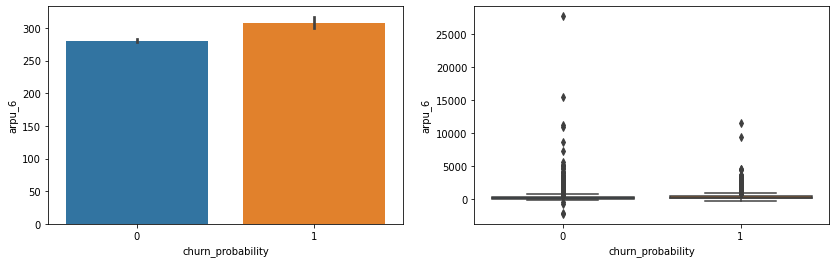

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.barplot(x ="churn_probability" , y ="arpu_6" , data=train, ax=axs[0])
sns.boxplot(x = "churn_probability", y = "arpu_6", data=train, ax=axs[1])

<AxesSubplot:xlabel='churn_probability', ylabel='arpu_7'>

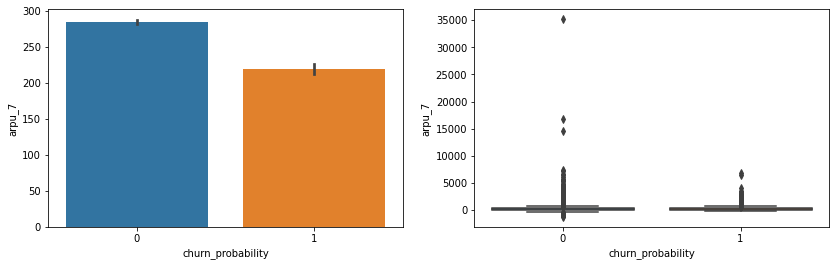

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.barplot(x ="churn_probability" , y ="arpu_7" , data=train, ax=axs[0])
sns.boxplot(x = "churn_probability", y = "arpu_7", data=train, ax=axs[1])

<AxesSubplot:xlabel='churn_probability', ylabel='arpu_8'>

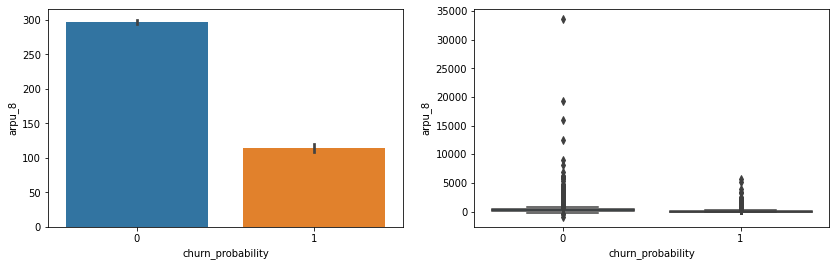

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.barplot(x ="churn_probability" , y ="arpu_8" , data=train, ax=axs[0])
sns.boxplot(x = "churn_probability", y = "arpu_8", data=train, ax=axs[1])

### Criando a variável: arpu_med

<AxesSubplot:xlabel='churn_probability', ylabel='arpu_med'>

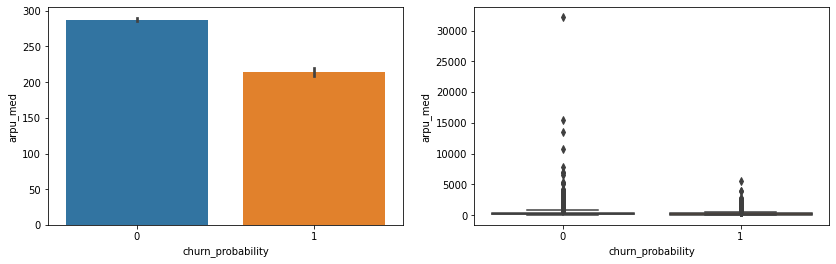

In [28]:
train['arpu_med'] = (train.arpu_6 + train.arpu_7 + train.arpu_8) / 3

fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.barplot(x ="churn_probability" , y ="arpu_med" , data=train, ax=axs[0])
sns.boxplot(x = "churn_probability", y = "arpu_med", data=train, ax=axs[1])

In [36]:
train[['arpu_6','arpu_7','arpu_8']].corr()

,arpu_6,arpu_7,arpu_8
arpu_6,1.00000000,0.74372992,0.64319303
arpu_7,0.74372992,1.00000000,0.78233190
arpu_8,0.64319303,0.78233190,1.00000000


### onnet_mou_6

<AxesSubplot:xlabel='churn_probability', ylabel='onnet_mou_6'>

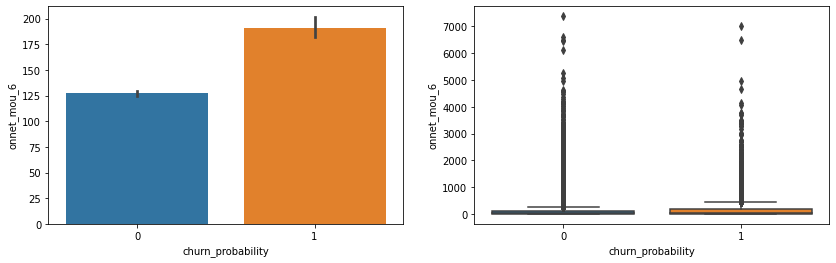

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.barplot(x ="churn_probability" , y ="onnet_mou_6" , data=train, ax=axs[0])
sns.boxplot(x = "churn_probability", y = "onnet_mou_6", data=train, ax=axs[1])

### onnet_mou_7

<AxesSubplot:xlabel='churn_probability', ylabel='onnet_mou_7'>

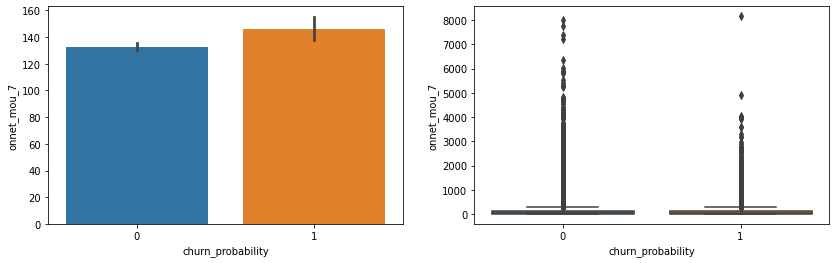

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.barplot(x ="churn_probability" , y ="onnet_mou_7" , data=train, ax=axs[0])
sns.boxplot(x = "churn_probability", y = "onnet_mou_7", data=train, ax=axs[1])

### onnet_mou_8

<AxesSubplot:xlabel='churn_probability', ylabel='onnet_mou_8'>

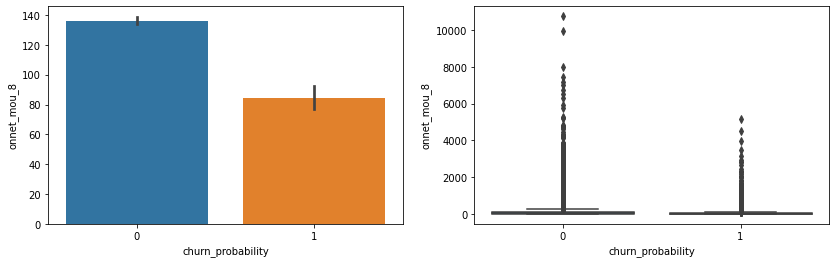

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.barplot(x ="churn_probability" , y ="onnet_mou_8" , data=train, ax=axs[0])
sns.boxplot(x = "churn_probability", y = "onnet_mou_8", data=train, ax=axs[1])

### Criando a variável: onnet_mou_med

<AxesSubplot:xlabel='churn_probability', ylabel='onnet_mou_med'>

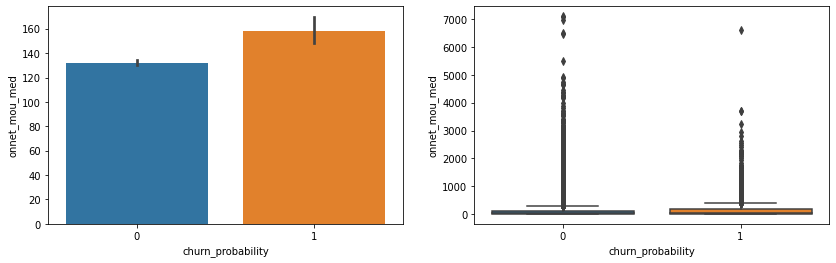

In [32]:
train['onnet_mou_med'] = (train.onnet_mou_6 + train.onnet_mou_7 + train.onnet_mou_8) / 3

fig, axs = plt.subplots(ncols=2, figsize=(14,4))
sns.barplot(x ="churn_probability" , y ="onnet_mou_med" , data=train, ax=axs[0])
sns.boxplot(x = "churn_probability", y = "onnet_mou_med", data=train, ax=axs[1])

In [35]:
train[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].corr()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
onnet_mou_6,1.00000000,0.74894721,0.63209619
onnet_mou_7,0.74894721,1.00000000,0.79472590
onnet_mou_8,0.63209619,0.79472590,1.00000000
